In [1]:
from manim import *

config.media_width = "75%"
config.verbosity = "WARNING"

from potential import GatePotential

phi = GatePotential(50e-9, 90e-9, 10e-9, 1e-3, -1e-3, 1e-3, -1e-5)

Manim Community v0.17.3

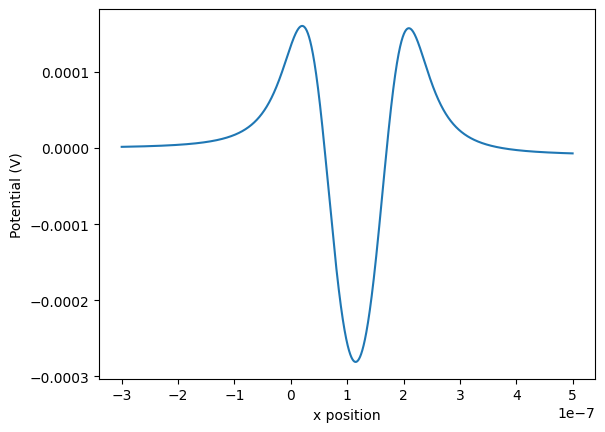

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
xs = np.linspace(-300e-9, 500e-9, 10000)
ys = np.zeros_like(xs)

phi = GatePotential(50e-9, 90e-9, 10e-9, 1e-3, -1e-3, 1e-3, -1e-5)

for i, x in enumerate(xs):
    ys[i] = phi(x)

plt.plot(xs, ys)
plt.xlabel('x position')
plt.ylabel('Potential (V)')
plt.show()

In [9]:
%%manim -qm gatepot

class gatepot(Scene):
    def construct(self):
        phi.V1 = 1e-3
        ax = Axes(x_range=[-300e-9, 500e-9, 50e-9], y_range=[-2e-4, 8e-4, 1e-4], x_length = 10, y_length = 6, tips=False)
        graph = ax.plot(phi, color=YELLOW)
        # graph = ax.plot(lambda x: x**2, color=YELLOW)
        # graph = ax.FunctionGraph(phi, x_range=[-300e-9, 500e-9], color=YELLOW)
        # self.add(graph)
        # graph.stretch(1000)
        v1 = DecimalNumber(phi.V1, num_decimal_places=3, include_sign=True)
        v1.move_to(2*UP + 3*LEFT)
        self.play(Create(ax), Create(v1), Create(graph), run_time=3)
        self.wait(1)
        phi.V1 = 3e-3
        graph.target = ax.plot(phi, color=YELLOW)
        self.play(MoveToTarget(graph), ChangeDecimalToValue(v1, phi.V1), run_time=3)
        self.wait(1)

In [3]:
%%manim -qm PotentialWell

class PotentialWell(Scene):
    def construct(self):
        graph = ImplicitFunction(
        lambda x, y: -(x**2-1.75)*(x**2-1.75)+2 -y,color=YELLOW)
        dot = Dot(color=BLUE).shift(3*LEFT)
        line = Line(0,1, color=RED)
        line.put_start_and_end_on([-0.6,0,0], [0.6,0,0])
        source = Text('Source').scale(1).move_to([-5,0,0])
        drain = Text('Drain').scale(1).move_to([5,0,0])
        self.add(graph)
        self.add(source)
        self.add(line)
        self.add(drain)
        self.wait()
        self.add(dot)
        self.play(Rotating(dot, radians=-PI, about_point=[-1.5,0,0], run_time=2))
        self.wait()
        self.play(Rotating(dot, radians=-PI, about_point=[1.5,0,0], run_time=2))
        self.wait()

In [4]:
%%manim -qm test_dot

class test_dot(Scene):
    def construct(self):
        background_image = ImageMobject("media/images/Other/Dodson_well.png")
        background_image.scale(5)
        background_image.to_edge(DOWN)
        dot = Dot(color=BLUE).shift(3*LEFT)
        self.add(background_image)
        self.add(dot)
        self.play(Rotating(dot, radians=-PI, about_point=[-1.5,0,0], run_time=2))
        self.wait()
        self.play(Rotating(dot, radians=-PI, about_point=[1.5,0,0], run_time=2))
        self.wait()

OSError: From: /Users/alecroberson/Documents/projects/HRL-Labs-Clinic, could not find media/images/Other/Dodson_well.png at either of these locations: ['media/images/Other/Dodson_well.png', 'media/images/Other/Dodson_well.png', 'media/images/Other/Dodson_well.png.jpg', 'media/images/Other/Dodson_well.png.jpeg', 'media/images/Other/Dodson_well.png.png', 'media/images/Other/Dodson_well.png.gif', 'media/images/Other/Dodson_well.png.ico']